

# **Quantum State Preparation**

This notebook implements a routine to prepare n-qubit quantum states from a given set of complex amplitudes.

Key features:
- Supports any number of qubits, as long as the input vector length is a power of two ($2^n$).
- Automatically normalizes the input amplitudes to enforce the quantum state condition. $$
\sum_{i=1}^{2^n} |a_i|^2 = 1
$$
- Provides visualization of amplitude magnitudes and phases.
- Includes inline tests to verify normalization, vector length, and error handling.

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

# get_num_qubits(length)

Given the length of the amplitude vector, this function:
- Checks that the length is a power of two.
- Returns the corresponding number of qubits n, since a state vector of length $2^n$ represents n qubits.
- Raises a ValueError if the length is not a power of two.

Example:
- length = 4 → n = 2 qubits
- length = 8 → n = 3 qubits


In [21]:
def get_num_qubits(length: int) -> int:

    if length <= 0 or (length & (length - 1)) != 0:
        raise ValueError(f"Length {length} is not a power of two (expected 2^n).")
    return int(math.log2(length))

# prepare_quantum_state(amplitudes, normalize=True)

This is the core function for preparing the quantum state |ψ⟩.

Input:
- amplitudes: list or 1D numpy array of complex numbers $\mathbf{a} = [a_0, a_1, \dots, a_{2^n - 1}]$

- normalize (bool, default=True):
  - If True, automatically scales the amplitudes to ensure the vector has unit norm.
  - If False, raises an error if the amplitudes are not already normalized.

Steps:
1. Converts the input to a NumPy complex array.
2. Checks that it is 1D and non-empty.
3. Uses `get_num_qubits` to verify that the length is a power of two and compute n.
4. Computes the vector norm ||ψ||.
5. Normalizes if needed or checks for errors in strict mode.

Output:
- A normalized 1D NumPy array representing the n-qubit quantum state |ψ⟩.


In [22]:
def prepare_quantum_state(amplitudes, normalize=True):

    amps = np.array(amplitudes, dtype=np.complex128)

    # Ensure input is a 1D vector
    if amps.ndim != 1:
        raise ValueError("Amplitudes must be a 1D sequence/vector.")
    if amps.size == 0:
        raise ValueError("Amplitude vector must be non-empty.")

    # Validate dimension (must be 2^n)
    n_qubits = get_num_qubits(amps.size)

    # Compute norm
    norm = np.linalg.norm(amps)
    if norm == 0:
        raise ValueError("Amplitude vector has zero norm and cannot be normalized.")

    # Handle normalization or validation
    if normalize:
        if not np.isclose(norm, 1.0):
            amps = amps / norm
    else:
        # strict mode: check normalization
        if not np.isclose(norm, 1.0):
            raise ValueError(
                f"State not normalized (norm={norm:.6f}), but normalize=False was set."
            )

    return amps

# visualize_state(state)

This function plots:
- Magnitude of each amplitude as a blue bar.
- Phase of each amplitude as a text overlay above the bars (in radians).

Purpose:
- Gives a clear visual representation of the quantum state.
- Useful for checking which basis states have nonzero probability amplitudes and their relative phases.

Example:
For a 2-qubit state |ψ⟩ = [0.5, 0.5j, 0, 0.5]:
- Magnitudes = [0.5, 0.5, 0, 0.5]
- Phases = [0, π/2, 0, 0]


In [23]:
def visualize_state(state):
    """
    Plot magnitude and phase of a quantum state vector.
    """
    state = np.array(state)
    n = len(state)
    x = np.arange(n)
    magnitudes = np.abs(state)
    phases = np.angle(state)

    fig, ax1 = plt.subplots(figsize=(7,4))
    ax1.bar(x, magnitudes, color="royalblue", alpha=0.7, label="|amplitude|")
    ax1.set_ylabel("Magnitude")
    ax1.set_xlabel("Basis state index")
    ax1.set_xticks(x)
    ax1.set_title("Quantum State Visualization (Magnitude + Phase)")

    # Add phase overlay as text
    for i, (mag, phase) in enumerate(zip(magnitudes, phases)):
        ax1.text(i, mag + 0.02, f"∠{phase:.2f}", ha="center", fontsize=8, color="darkgreen")
    plt.show()

# Demonstration: Preparing and Visualizing a Two-Qubit Quantum State

In this demonstration, we show how to prepare a two-qubit quantum state from a set of complex amplitudes and visualize its properties.

## Steps:

1. **Define amplitudes**  
   We provide a list of four complex numbers `[a0, a1, a2, a3]` representing the state:
   $
   |\psi\rangle = a_0|00\rangle + a_1|01\rangle + a_2|10\rangle + a_3|11\rangle
   $

2. **Prepare the quantum state**  
   We call `prepare_quantum_state(amplitudes)` which:
   - Converts the input to a NumPy array.
   - Checks that the length is a power of two (valid for 2 qubits).
   - Normalizes the vector so that $\sum_i |a_i|^2 = 1$.

3. **Print state information**
   - The full normalized state vector |ψ⟩.
   - The norm of the state (should be 1).
   - The number of qubits.

4. **Visualize the state**
   We use `visualize_state(psi)` to display:
   - Magnitudes of each amplitude as blue bars.
   - Phase of each amplitude (in radians) as text labels above the bars.

This provides a clear and intuitive representation of the quantum state in both magnitude and phase.


Prepared state |ψ⟩: [0.57735027+0.j         0.        +0.57735027j 0.        +0.j
 0.57735027+0.j        ]
Norm: 1.0
Number of qubits: 2


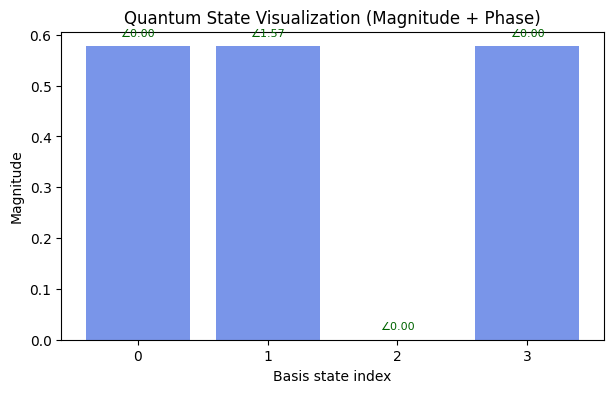

In [24]:
amps = [1+0j, 1j, 0, 1]  # Example 2-qubit state
psi = prepare_quantum_state(amps)
print("Prepared state |ψ⟩:", psi)
print("Norm:", np.linalg.norm(psi))
print("Number of qubits:", get_num_qubits(len(psi)))
visualize_state(psi)


# Inline Test Cases

The notebook includes verbose tests that:
- Print the input amplitudes.
- Show the resulting normalized state vector |ψ⟩.
- Verify the vector norm is 1.
- Check that the vector length corresponds to the correct number of qubits.
- Handle expected errors for:
  - Zero-length vector
  - Zero-norm vector
  - Non-power-of-two length
  - Non-normalized input with normalize=False

Purpose:
- Ensures correctness and makes it clear to anyone evaluating the notebook that the code works as intended.


In [25]:
def run_tests_verbose():
    print("\nRunning tests with detailed input/output...\n")

    # Test 1: Two-qubit normalization
    amps = [1, 1j, 0, 1]
    print("Test 1: Two-qubit normalization")
    print("Input amplitudes:", amps)
    psi = prepare_quantum_state(amps)
    print("Normalized state |ψ⟩:", psi)
    print("Norm:", np.linalg.norm(psi))
    print("Number of qubits:", get_num_qubits(len(psi)))
    print("-"*50)

    # Test 2: General 3-qubit state
    amps = np.arange(8) + 1j*np.arange(8)
    print("Test 2: General 3-qubit state")
    print("Input amplitudes:", amps)
    psi = prepare_quantum_state(amps)
    print("Normalized state |ψ⟩:", psi)
    print("Norm:", np.linalg.norm(psi))
    print("Number of qubits:", get_num_qubits(len(psi)))
    print("-"*50)

    # Test 3: normalize=False with valid state
    amps = [1/np.sqrt(2), 1/np.sqrt(2)]
    print("Test 3: normalize=False with already normalized state")
    print("Input amplitudes:", amps)
    psi = prepare_quantum_state(amps, normalize=False)
    print("State |ψ⟩:", psi)
    print("Norm:", np.linalg.norm(psi))
    print("-"*50)

    # Test 4: normalize=False with invalid state (expect error)
    amps = [2, 0]
    print("Test 4: normalize=False with unnormalized input (expect error)")
    print("Input amplitudes:", amps)
    try:
        psi = prepare_quantum_state(amps, normalize=False)
        print("ERROR: This should have raised a ValueError!")
    except ValueError as e:
        print("Caught expected ValueError:", e)
    print("-"*50)

    # Test 5: Invalid length input
    amps = [1, 0, 0]
    print("Test 5: Invalid length (not power of two)")
    print("Input amplitudes:", amps)
    try:
        psi = prepare_quantum_state(amps)
        print("ERROR: This should have raised a ValueError!")
    except ValueError as e:
        print("Caught expected ValueError:", e)
    print("-"*50)

    # Test 6: Zero vector input
    amps = [0, 0, 0, 0]
    print("Test 6: Zero vector input")
    print("Input amplitudes:", amps)
    try:
        psi = prepare_quantum_state(amps)
        print("ERROR: This should have raised a ValueError!")
    except ValueError as e:
        print("Caught expected ValueError:", e)
    print("-"*50)

    print("✅ All tests completed with input/output verification.\n")

# Run verbose tests
run_tests_verbose()


Running tests with detailed input/output...

Test 1: Two-qubit normalization
Input amplitudes: [1, 1j, 0, 1]
Normalized state |ψ⟩: [0.57735027+0.j         0.        +0.57735027j 0.        +0.j
 0.57735027+0.j        ]
Norm: 1.0
Number of qubits: 2
--------------------------------------------------
Test 2: General 3-qubit state
Input amplitudes: [0.+0.j 1.+1.j 2.+2.j 3.+3.j 4.+4.j 5.+5.j 6.+6.j 7.+7.j]
Normalized state |ψ⟩: [0.        +0.j         0.05976143+0.05976143j 0.11952286+0.11952286j
 0.17928429+0.17928429j 0.23904572+0.23904572j 0.29880715+0.29880715j
 0.35856858+0.35856858j 0.41833001+0.41833001j]
Norm: 1.0
Number of qubits: 3
--------------------------------------------------
Test 3: normalize=False with already normalized state
Input amplitudes: [np.float64(0.7071067811865475), np.float64(0.7071067811865475)]
State |ψ⟩: [0.70710678+0.j 0.70710678+0.j]
Norm: 0.9999999999999999
--------------------------------------------------
Test 4: normalize=False with unnormalized input